# 机器学习中的优化算法--作业

<center>刘丹</center>

## 逻辑回归

### 什么是逻辑回归

**逻辑回归**虽然带有回归字样，但是逻辑回归属于分类算法。逻辑回归可以进行多分类操作，但由逻辑回归算法本身性质决定其更常用于二分类。逻辑回归虽然名字叫做回归，但实际上却是一种分类学习方法。 线性回归完成的是回归拟合任务，而对于分类任务，我们同样需要一条线，但不是去拟合每个数据点，而是把不同类别的样本区分开来。

![](imgs/optim_in_ml_homework/logistic_regression.png)

### Sigmoid

对于二分类问题，$y\in\{0,1\}$，$1$表示正例，$0$表示负例。逻辑回归是在线性函数$\theta^\top x$输出预测实际值的基础上，寻找一个假设函数函数$h_\theta(x)=g(\theta^\top x)$，将实际值映射到到$0，1$之间，如果$h_\theta(x)>0.5$，则预测$y=1$，及$y$属于正例；如果$h_\theta(x)<0.5$，则预测$y=0$，即$y$属于负例。

逻辑回归中选择对数几率函数（logistic function）作为激活函数，对数几率函数是Sigmoid函数（形状为S的函数）的重要代表。

sigmoid公式：
\begin{equation}
Y(z) = \frac{1}{1+e^{-z}}
\end{equation}

画出其波形图如下：

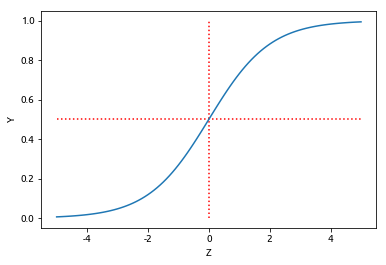

In [524]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

Z = np.array(list(map(lambda x : (x - N / 2)/10 , range(N+1))))
Y = 1 / (1 + np.exp(-Z))

plt.plot(X, Y)
plt.xlabel("Z")
plt.ylabel("Y")

plt.hlines(0.5, -5, 5, colors="r", linestyles="dotted")
plt.vlines(0, 0, 1, colors="r", linestyles="dotted")

### 逻辑回归数学表达

线性回归：

\begin{equation}
z = \theta^\top x + b
\end{equation}

逻辑回归：

\begin{equation}
h_\theta(x) = Y(z) = \frac{1}{1+e^{-(\theta^\top x)}}
\end{equation}

其中$\theta$是参数向量。对于$h_\theta(x)$的直观解释是：对于给定的输入$x$，$h_\theta(x)$表示其对应类标$y=1$即属于正例的概率。

对于输入$x$分类结果为类别$1$和类别$0$的概率分别为：

\begin{align}
P\{y=1|x;\theta\} &= h_\theta(x); \\
P\{y=0|x;\theta\} &= 1 - h_\theta(x).
\end{align}

例如，如果对于给定的x，通过已经确定的参数计算得出$h_\theta(x)=0.7$，则表示有$70\%$的几率$y$为正例，相应的$y$为负例的几率为$0.3$。

### 决策面

在逻辑回归中，我们预测：

- 当$h_\theta$大于等于$0.5$时，预测$y=1$;
- 当$h_\theta$小于$0.5$时，预测$y=0$。

由sigmoid函数的特性：
- $z=0$时，$g(z) = 0.5$；
- $z>0$时，$g(z) > 0.5$；
- $z<0$时，$g(z) < 0.5$。

又$z=\theta^\top x$，所以

- $\theta^\top x$大于等于$0$时，预测$y=1$；
- $\theta^\top x$小于$0$时，预测$y=0$

假设我们有一个模型：$h_\theta(x)=g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$并且参数$\theta$是向量$[-3, 1, 1]^\top$。 则当$-3 + x_1 + x_2$大于等于$0$，模型将预测$y=1$。 绘制直线$-3 + x_1+x_2=0$，便是我们模型的分界线，将预测为$1$的区域和预测为$0$的区域分隔开。

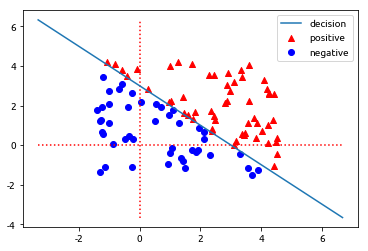

In [523]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Ubuntu']
plt.rcParams['axes.unicode_minus']=False

N = 100

X1  = np.array(list(map(lambda x: (x-N/3)/10, range(N+1))))

X2 = 3 - X1

plt.hlines(0, X1.min(), X1.max(), colors="r", linestyles="dotted")
plt.vlines(0, X2.min(), X2.max(), colors="r", linestyles="dotted")

plt.plot(X1, X2, label="decision")

dots = np.random.random((N, 2)) * 6 - 1.5

positive = dots.sum(axis=1)-3>=0

plt.scatter(dots[positive][:, 0], dots[positive][:, 1], marker='^', c='r', label="positive")
plt.scatter(dots[~positive][:, 0], dots[~positive][:, 1], marker='o', c='b', label="negative")

plt.legend()

### 损失函数

在分类问题中使用的损失函数一般是交叉熵

\begin{equation}
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))]
\end{equation}

$J(\theta)$的梯度:

\begin{equation}
\frac{\partial}{\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(j)}
\end{equation}



所以最后目标变成取$J(\theta)$最小值时的$\theta$为最佳参数。 与线性回归类似，利用梯度下降法更新$\theta$。

\begin{align}
\theta_j &:= \theta_j - \alpha \cdot \frac{\partial}{\theta_j}J(\theta) \\
&:= \theta_j - \alpha\cdot \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(j)}
\end{align}

### 正则化

正则化逻辑回归


\begin{equation}
J(\theta)=-\frac{1}{m}\sum^m_{i=1}\left[y^{(i)}\log{h_\theta(x^{(i)})}+(1-y^{(i)})\log({1-h_\theta(x^{(i)})})\right]+\frac{\lambda}{2m}\sum^n_{j=1}\theta^2_j
\end{equation}

正则优化：

\begin{equation}
\begin{split}
\theta_0&:=\theta_0-\alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_0 \\
\theta_j&:=\theta_j-\alpha\frac{1}{m}\sum^m_{i=1}((h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j+\frac{\lambda}{m}\theta_j) \mbox{ for } j=1,2,\ldots,n
\end{split}
\end{equation}

## 逻辑回归python实现

### 准备数据

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generage_data(N=100):
    # 产生N个随机二元组（x1, x2）
    data = np.random.random((N, 2)) * 6 - 1.5

    # 为这N个随机二元组添加标签
    label = np.zeros((N))
    positive = data.sum(axis=1)-3>=0
    label[positive] = 1
    
    return {"data":data, "label":label}

In [ ]:
class MData(object):
    def __init__(self, N):
        self.N = N
        
        self.data = self._generage_data(N)
        
    def _generage_data(self, N=100):
        
        # 产生N个随机二元组（x1, x2）
        data = np.random.random((N, 2)) * 6 - 1.5

        # 为这N个随机二元组添加标签
        label = np.zeros((N))
        positive = data.sum(axis=1)-3>=0
        label[positive] = 1

        return np.array([{"data":item, "label":ann} for item, ann in zip(data, label)])
    
    def __len__(self):
        return self.N

    def __getitem__(self, ix):
        if isinstance(ix, str):
            return np.array([item[ix].tolist() for item in self.data])
        return self.data[ix]

In [ ]:
class Dataloader(object):
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        
        self.__set_index()
        
    def __len__(self):
        return len(self.dataset) // self.batch_size
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index == len(self):
            raise StopIteration
            
        _start = self.index * self.batch_size
        _stop = _start + self.batch_size
        
        self.index += 1
            
        return {"data":self.dataset["data"][_start:_stop],
               "label":self.dataset["label"][_start:_stop]}
            
    def __set_index(self):
        self.index = 0

In [ ]:
train_data = MData(1000)
test_data = MData(100)

In [ ]:
data_loader = Dataloader(train_data, batch_size=3)

### 定义模型

In [ ]:
class Sigmoid(object):
    def __call__(self, x):
        self.ex = np.exp(-1 * x)
        
        return 1 / (1 + self.ex)
    
    def backward(self, x):
        return x * self.ex/(1+self.ex)**2
    
    def setup(self):
        pass

In [ ]:
class Liner(object):
    def __init__(self, n):
        self.weight = np.random.random(size=(n,))
        self.bias = np.random.random()
            
    def __call__(self, x):
        self.weight_b = x
        self.bias_b = 1
            
#         x = self.weight.dot(x) + self.bias
        x = np.tensordot(self.weight, x, axes=[0, 1]) + self.bias
        return x
        
    def backward(self, x):
        #self.weight_b *= x
        self.bias_b *= x.mean()
        #print(x.shape, self.bias_b.shape)
        self.weight_b = np.tensordot(self.weight_b, x, axes=[0, 0])
        
        
        return self.weight
    
    def setup(self, lr):
        self.weight -= lr * self.weight_b
        self.bias -= lr * self.bias_b



In [ ]:
class Mode(object):
    def __init__(self, size=(2,)):
        self.liner = Liner(size[0])
        self.sigmoid = Sigmoid()
        
    def __call__(self, x):
        return self.sigmoid(self.liner(x))
    
    def backward(self, x):
        y = self.liner.backward(self.sigmoid.backward(x))
        return y
    
    def setup(self, lr = 0.1):
        self.liner.setup(lr)

In [ ]:
class Binary_Cross_Encropy(object):
    def __call__(self, predicts, targets):
        assert(predicts.shape == targets.shape)
        self.predicts = predicts
        self.targets = targets
        loss = np.multiply(np.log(predicts), targets) + np.multiply(np.log(1-predicts), 1-predicts)
        return loss.mean() * -1
    
    def backward(self, x):
        loss_b = np.multiply(self.targets, 1/self.predicts) - np.multiply(1-self.targets, 1/(1-self.predicts))
        return loss_b/self.targets.shape[0]
        

In [ ]:
Net = Mode()

### 训练

In [ ]:
epoch_num = 50
batch_size = 10
lr = 0.1
train_loader = Dataloader(train_data, batch_size=10)
test_loader = Dataloader(test_data)
loss = Binary_Cross_Encropy()

for epoch in range(epoch_num):
    for samples in train_loader:
        inputs = samples["data"]
        labels = samples["label"]
        
        outputs = Net(inputs)
        print(loss(outputs, labels))
        Net.backward(loss.backward(1))
        Net.setup(lr=lr)
        
    

In [ ]:
for samples in test_loader:
    inputs = samples["data"]
    labels = samples["label"]

    outputs = Net(inputs)
    print(loss(outputs, labels))